In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "C:/Users/bvkka/Desktop/states_all.csv"

# Read US Education file and store into Pandas data frame
df = pd.read_csv(file_to_load)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
#Checking NA's in each column 
count_nan = len(df) - df.count()
count_nan


PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [5]:
#Drop NA's
dfstate_year =df[['PRIMARY_KEY','STATE','TOTAL_EXPENDITURE','YEAR']].dropna(axis=0,how='any')

In [6]:
#Drop duplicates
dfstate_year=dfstate_year.drop_duplicates(subset=['PRIMARY_KEY'],keep=False)

In [7]:
df4 = dfstate_year
df4.head()

,PRIMARY_KEY,STATE,TOTAL_EXPENDITURE,YEAR
0,1992_ALABAMA,ALABAMA,2653798.0,1992
1,1992_ALASKA,ALASKA,972488.0,1992
2,1992_ARIZONA,ARIZONA,3401580.0,1992
3,1992_ARKANSAS,ARKANSAS,1743022.0,1992
4,1992_CALIFORNIA,CALIFORNIA,27138832.0,1992


In [8]:
#For last 10 years 
df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE')
df4.head()

C:\Users\bvkka\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,PRIMARY_KEY,STATE,TOTAL_EXPENDITURE,YEAR
0,1992_ALABAMA,ALABAMA,2653798.0,1992
1,1992_ALASKA,ALASKA,972488.0,1992
2,1992_ARIZONA,ARIZONA,3401580.0,1992
3,1992_ARKANSAS,ARKANSAS,1743022.0,1992
4,1992_CALIFORNIA,CALIFORNIA,27138832.0,1992


In [19]:
#Top 5 performing States with mean expenditure over a 10 year period 
df5=df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE').mean().sort_values(by=['TOTAL_EXPENDITURE']).iloc[:,0].nlargest(5)
df5.head()
df100 = df5.reset_index(name = 'TOTAL_EXPENDITURE')
df100

C:\Users\bvkka\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,STATE,TOTAL_EXPENDITURE
0,CALIFORNIA,74179708.6
1,NEW_YORK,60014561.8
2,TEXAS,52576146.9
3,ILLINOIS,28901465.4
4,PENNSYLVANIA,28217887.6


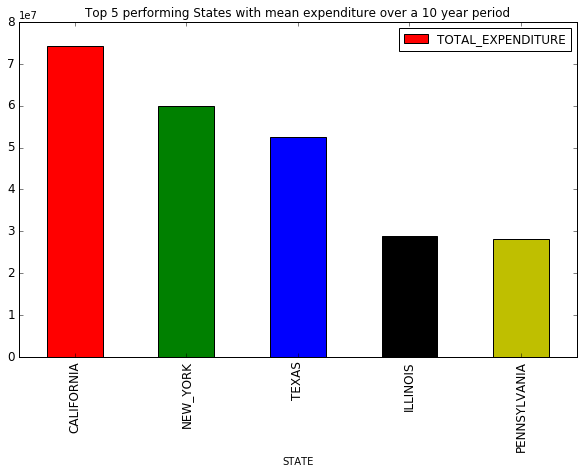

In [18]:
#VISUALIZATION
#Top 5 performing States with mean expenditure over a 10 year period 

import matplotlib.pyplot as plt
%matplotlib inline

ax = df100.plot(x = 'STATE' , y = 'TOTAL_EXPENDITURE',color ='rgbkymc', kind='bar', title ="Top 5 performing States with mean expenditure over a 10 year period", figsize=(10, 6), legend=True, fontsize=12)


plt.show()

In [22]:
#Bottom 5 performing States with mean expenditure over a 10 year period 
df6=df4[(df4['YEAR']>=2007) & (df['YEAR']<2018)].iloc[:,1:3].groupby('STATE').mean().sort_values(by=['TOTAL_EXPENDITURE']).iloc[:,0].nsmallest(5)
df6.head()
df200 = df6.reset_index(name = 'TOTAL_EXPENDITURE')
df200

C:\Users\bvkka\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,STATE,TOTAL_EXPENDITURE
0,DISTRICT_OF_COLUMBIA,1276065.0
1,SOUTH_DAKOTA,1310061.0
2,NORTH_DAKOTA,1410779.7
3,MONTANA,1669207.9
4,WYOMING,1701769.1


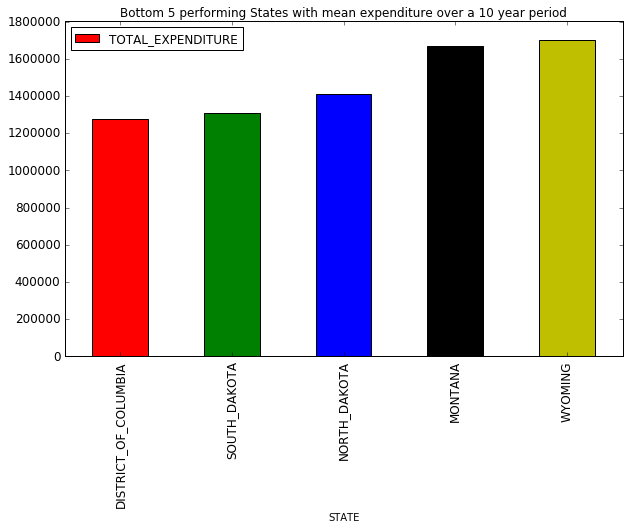

In [23]:
#VISUALIZATION
#Bottom 5 performing States with mean expenditure over a 10 year period 

import matplotlib.pyplot as plt
%matplotlib inline

ax = df200.plot(x = 'STATE' , y = 'TOTAL_EXPENDITURE',color ='rgbkymc', kind='bar', title ="Bottom 5 performing States with mean expenditure over a 10 year period", figsize=(10, 6), legend=True, fontsize=12)


plt.show()
